In [0]:
#ML Step: 1 - Exploratory Data Analysis
#Step: 1.1 Importing the MLflow library and enable auto logging
import mlflow
mlflow.pyspark.ml.autolog() 

In [0]:
#Verifying the uploaded file faultDataset.csv @ DBFS location /FileStore/tables/
dbutils.fs.ls("/FileStore/tables/")

Out[2]: [FileInfo(path='dbfs:/FileStore/tables/ accounts/', name=' accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/ logs/', name=' logs/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/ webpage/', name=' webpage/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/CT2021DF_FA2.csv/', name='CT2021DF_FA2.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/CT2021Q5DF.csv/', name='CT2021Q5DF.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/FaultDataset.csv', name='FaultDataset.csv', size=1703184, modificationTime=1677847177000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data-1.csv', name='Occupancy_Detection_Data-1.csv', size=50968, modificationTime=1677836655000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1677686371000),
 FileInfo(path='dbfs:/FileStore/tables/Q

In [0]:
#ML Step: 1.2 Loading/ingesting the given CSV file(FaultDataset.csv) into a new Spark DataFrame(DF) 
faultdatadf = spark.read.csv("/FileStore/tables/FaultDataset.csv",header="true",inferSchema="true")

In [0]:
#ML Step: 1.3 Verifying the Schema of the created Dataframe
faultdatadf.printSchema()

root
 |-- 1: double (nullable = true)
 |-- 2: double (nullable = true)
 |-- 3: double (nullable = true)
 |-- 4: double (nullable = true)
 |-- 5: double (nullable = true)
 |-- 6: double (nullable = true)
 |-- 7: double (nullable = true)
 |-- 8: double (nullable = true)
 |-- 9: double (nullable = true)
 |-- 10: double (nullable = true)
 |-- 11: double (nullable = true)
 |-- 12: double (nullable = true)
 |-- 13: double (nullable = true)
 |-- 14: double (nullable = true)
 |-- 15: double (nullable = true)
 |-- 16: double (nullable = true)
 |-- 17: double (nullable = true)
 |-- 18: double (nullable = true)
 |-- 19: double (nullable = true)
 |-- 20: double (nullable = true)
 |-- fault_detected: integer (nullable = true)



In [0]:
#ML Step: 1.4 - Display of Dataframe content using display() method
display(faultdatadf)

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,fault_detected
0.3503125,0.3496875,0.35,0.3459375,0.3475,0.3459375,0.341875,0.3434375,0.355,0.3553125,0.3459375,0.3525,0.3575,0.3590625,0.35875,0.3484375,0.3590625,0.35,0.3559375,0.3490625,0
0.5090625,0.484375,0.046875,0.071875,0.06,0.0634375,0.0575,0.0546875,0.0559375,0.058125,0.0628125,0.065625,0.0640625,0.0634375,0.0534375,0.084375,0.0615625,0.05375,0.076875,0.056875,0
0.0928125,0.0975,0.1096875,0.1025,0.09625,0.1053125,0.09875,0.098125,0.091875,0.0909375,0.09875,0.103125,0.1,0.1034375,0.1015625,0.0978125,0.0990625,0.10375,0.098125,0.1040625,0
0.09375,0.089375,0.091875,0.0996875,0.0909375,0.096875,0.0940625,0.096875,0.096875,0.099375,0.099375,0.0959375,0.0959375,0.0940625,0.09125,0.0996875,0.09375,0.0934375,0.0971875,0.094375,0
0.036875,0.0440625,0.038125,0.0428125,0.0353125,0.0340625,0.033125,0.0403125,0.0346875,0.036875,0.035625,0.03625,0.0409375,0.039375,0.035,0.040625,0.0384375,0.036875,0.04,0.0371875,0
0.135625,0.3034375,0.13875,0.140625,0.126875,0.130625,0.139375,0.143125,0.1290625,0.140625,0.1340625,0.1396875,0.1384375,0.1453125,0.1453125,0.1496875,0.1440625,0.1359375,0.1453125,0.14625,0
0.3446875,0.35125,0.3353125,0.3471875,0.34625,0.348125,0.3478125,0.3521875,0.3525,0.35125,0.3571875,0.360625,0.3640625,0.36625,0.3640625,0.3634375,0.3475,0.35375,0.1575,0.351875,0
0.036875,0.035625,0.03125,0.0375,0.0390625,0.034375,0.0315625,0.031875,0.0378125,0.0321875,0.0371875,0.038125,0.035,0.0353125,0.0325,0.03,0.0325,0.0321875,0.0321875,0.03125,0
0.0371875,0.039375,0.033125,0.04,0.04125,0.03875,0.035625,0.0384375,0.0378125,0.0365625,0.033125,0.0365625,0.03375,0.034375,0.0346875,0.04125,0.0365625,0.035,0.034375,0.0396875,0
0.3590625,0.3609375,0.360625,0.3590625,0.355,0.365,0.355625,0.358125,0.3575,0.3578125,0.355625,0.3584375,0.3521875,0.3459375,0.3521875,0.3509375,0.3525,0.35625,0.353125,0.3540625,0


In [0]:
#ML Step: 1.5 Renaming the column names from 'Numeric' name to 'Aplhanumeric' name in order to  create a Spark SQL View to show Scatter Graph and to calculate the Mean, Fault, Non-Fault, Minimum and Maximum values on the 20 sensor observations

faultdatadf = faultdatadf.withColumnRenamed("1","f1").withColumnRenamed("2","f2").withColumnRenamed("3","f3").withColumnRenamed("4","f4").withColumnRenamed("5","f5").withColumnRenamed("6","f6").withColumnRenamed("7","f7").withColumnRenamed("8","f8").withColumnRenamed("9","f9").withColumnRenamed("10","f10").withColumnRenamed("11","f11").withColumnRenamed("12","f12").withColumnRenamed("13","f13").withColumnRenamed("14","f14").withColumnRenamed("15","f15").withColumnRenamed("16","f16").withColumnRenamed("17","f17").withColumnRenamed("18","f18").withColumnRenamed("19","f19").withColumnRenamed("20","f20")
faultdatadf.printSchema()

root
 |-- f1: double (nullable = true)
 |-- f2: double (nullable = true)
 |-- f3: double (nullable = true)
 |-- f4: double (nullable = true)
 |-- f5: double (nullable = true)
 |-- f6: double (nullable = true)
 |-- f7: double (nullable = true)
 |-- f8: double (nullable = true)
 |-- f9: double (nullable = true)
 |-- f10: double (nullable = true)
 |-- f11: double (nullable = true)
 |-- f12: double (nullable = true)
 |-- f13: double (nullable = true)
 |-- f14: double (nullable = true)
 |-- f15: double (nullable = true)
 |-- f16: double (nullable = true)
 |-- f17: double (nullable = true)
 |-- f18: double (nullable = true)
 |-- f19: double (nullable = true)
 |-- f20: double (nullable = true)
 |-- fault_detected: integer (nullable = true)



Out[7]: <seaborn.axisgrid.FacetGrid at 0x7f9b53b4e490>

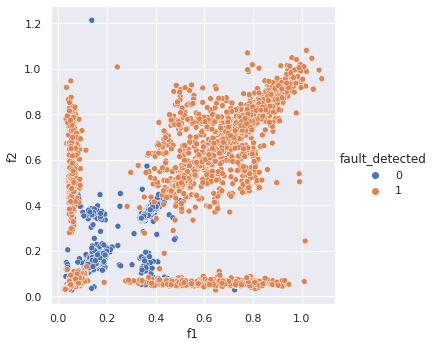

In [0]:
#ML Step: 1.6 Visualization carried out prior to training. 
#Creating instances for matplotlib, pandas and seaborn libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Converting the Spark Df to Pandas Df for creating Visualization
Fault_df= faultdatadf.toPandas()
# Applying the default theme to seaborn instance
sns.set_theme()
#Create  a visiualization
sns.relplot(data = Fault_df, x="f1", y="f2", hue="fault_detected" )

In [0]:
#ML Step: 1.7  Creating a temporary View for the 'faultdatadf' dataframe inorder to calculate the Mean, Minimum and Maximum on the 20 Sensor observations
faultdatadf.createOrReplaceTempView("faultdataview")

In [0]:
%sql
--ML Step: 1.8 Calculation of Mean value of all 20 vibration sensor readings (observations) from the SQL View - faultdataview
select fault_detected, avg(f1) as AVG_1, avg(f2) as AVG_2, avg(f3) as AVG_3, avg(f4) as AVG_4, avg(f5) as AVG_5, avg(f6) as AVG_f6, avg(f7) as AVG_7, avg(f8) as AVG_8, avg(f9) as AVG_9, avg(f10) as AVG_10, avg(f11) as AVG_11, avg(f12) as AVG_12, avg(f13) as AVG_13, avg(f14) as AVG_14, avg(f15) as AVG_15, avg(f16) as AVG_16, avg(f17) as AVG_17, avg(f18) as AVG_18, avg(f19) as AVG_19, avg(f20) as AVG_20  from faultdataview group by fault_detected order by fault_detected desc

fault_detected,AVG_1,AVG_2,AVG_3,AVG_4,AVG_5,AVG_f6,AVG_7,AVG_8,AVG_9,AVG_10,AVG_11,AVG_12,AVG_13,AVG_14,AVG_15,AVG_16,AVG_17,AVG_18,AVG_19,AVG_20
1,0.5345139636246223,0.5351908227507541,0.5354065997632375,0.5359103933491173,0.5363514986009466,0.5362730036590614,0.5369834938656909,0.5378515120533786,0.5384589566293595,0.5390929697589341,0.539499973095136,0.5398922460180796,0.5410531909169192,0.5418817934782603,0.5424007210503661,0.5432684029272485,0.544029339754627,0.5447457490314256,0.5455314383340506,0.5465267165303486
0,0.14873264636246228,0.15007149967714162,0.1488361628282389,0.1483677491390444,0.1493353825871714,0.14938286967283676,0.1484459077701255,0.14828003928110214,0.14788702647438637,0.14875739883770997,0.14871509093844146,0.14807623493327596,0.14718346427034043,0.1478757264313388,0.14739917402066308,0.14840010223848485,0.14724043532070547,0.1467593090830818,0.1475128470727503,0.14681473310374513


Output can only be rendered in Databricks

In [0]:
%sql
-- #ML Step: 1.9 SQL Query to find Fault and total Non-Fault readings along with Minimum and Maximum value of first 10 observation out of 20 vibration sensor readings (observations)
select sum(fault_detected) as Fault, count(*) - sum(fault_detected) as No_Fault, min(f1) as Min_1,  max(f1) as Max_1, Min(f2) as Min_2,Max(f2) as Max_2, Min(f3) as Min_3, Max(f3) as Max_3, Min(f4) as Min_4,Max(f4) as Max_4, Min(f5) as Min_5,Max(f5) as Max_5, Min(f6) as Min_6,Max(f6) as Max_6, Min(f7) as min_7, Max(f7) as max_7, min(f8) as Min_8, Max(f8) as Max_9, Min(f9) as Min_9, Max(f9) as Max_f9, min(f10) as Min_f10, max(f10) as Max_10   from faultdataview   

Fault,No_Fault,Min_1,Max_1,Min_2,Max_2,Min_3,Max_3,Min_4,Max_4,Min_5,Max_5,Min_6,Max_6,min_7,max_7,Min_8,Max_9,Min_9,Max_f9,Min_f10,Max_10
4646,4646,0.024375,1.0809375,0.024375,1.2134375,0.024375,1.0809375,0.024375,1.0809375,0.024375,1.0809375,0.024375,1.0809375,0.024375,1.0809375,0.024375,1.0809375,0.024375,1.0809375,0.024375,1.0809375


In [0]:
#ML Step: 2 Data Pre-processing
#Step 2.1 Applying RFormula transformer of pyspark library on 'faultdatadf'  
#importing RFormula from pyspark ML library
from pyspark.ml.feature import RFormula

#Formula to form vector out all columns(f1 to f20) except fault_detected.
preprocess = RFormula(formula="fault_detected ~ .")

#below 2 lines are to ensure the code is rerunnable for safer side
faultdatadf = faultdatadf.drop("features")
faultdatadf = faultdatadf.drop("label")

#fits the RFormula transformer instance onthe faultdatadf
faultdatadf = preprocess.fit(faultdatadf).transform(faultdatadf)


2023/04/20 11:41:32 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '7dc13a96a4eb4b078f7107e705633977', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow


In [0]:
#ML Step 2.2 Showing faultdatadf using show() method after applying R Formula transformer
#that Added two additonal columns Features(vector of all sensor readings except faultdetected) and Label(contains faultdetected value only)
faultdatadf.show(5)

+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+
|       f1|       f2|       f3|       f4|       f5|       f6|       f7|       f8|       f9|      f10|      f11|      f12|      f13|      f14|      f15|      f16|      f17|      f18|      f19|      f20|fault_detected|            features|label|
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+
|0.3503125|0.3496875|     0.35|0.3459375|   0.3475|0.3459375| 0.341875|0.3434375|    0.355|0.3553125|0.3459375|   0.3525|   0.3575|0.3590625|  0.35875|0.3484375|0.3590625|     0.35|0.3559375|0.3490625|             0|[0.3503125,0.3496...|  0.0|
|0.5090625| 0.484375| 0.

In [0]:
#ML Step 2.2 Showing faultdatadf using display() method after applying R Formula transformer 
#that Added two additonal columns Features(vector of all sensor readings except faultdetected) and Label(contains faultdetected value only)
#faultdatadf.show(5)
display(faultdatadf.limit(10))

f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,fault_detected,features,label
0.3503125,0.3496875,0.35,0.3459375,0.3475,0.3459375,0.341875,0.3434375,0.355,0.3553125,0.3459375,0.3525,0.3575,0.3590625,0.35875,0.3484375,0.3590625,0.35,0.3559375,0.3490625,0,"Map(vectorType -> dense, length -> 20, values -> List(0.3503125, 0.3496875, 0.35, 0.3459375, 0.3475, 0.3459375, 0.341875, 0.3434375, 0.355, 0.3553125, 0.3459375, 0.3525, 0.3575, 0.3590625, 0.35875, 0.3484375, 0.3590625, 0.35, 0.3559375, 0.3490625))",0.0
0.5090625,0.484375,0.046875,0.071875,0.06,0.0634375,0.0575,0.0546875,0.0559375,0.058125,0.0628125,0.065625,0.0640625,0.0634375,0.0534375,0.084375,0.0615625,0.05375,0.076875,0.056875,0,"Map(vectorType -> dense, length -> 20, values -> List(0.5090625, 0.484375, 0.046875, 0.071875, 0.06, 0.0634375, 0.0575, 0.0546875, 0.0559375, 0.058125, 0.0628125, 0.065625, 0.0640625, 0.0634375, 0.0534375, 0.084375, 0.0615625, 0.05375, 0.076875, 0.056875))",0.0
0.0928125,0.0975,0.1096875,0.1025,0.09625,0.1053125,0.09875,0.098125,0.091875,0.0909375,0.09875,0.103125,0.1,0.1034375,0.1015625,0.0978125,0.0990625,0.10375,0.098125,0.1040625,0,"Map(vectorType -> dense, length -> 20, values -> List(0.0928125, 0.0975, 0.1096875, 0.1025, 0.09625, 0.1053125, 0.09875, 0.098125, 0.091875, 0.0909375, 0.09875, 0.103125, 0.1, 0.1034375, 0.1015625, 0.0978125, 0.0990625, 0.10375, 0.098125, 0.1040625))",0.0
0.09375,0.089375,0.091875,0.0996875,0.0909375,0.096875,0.0940625,0.096875,0.096875,0.099375,0.099375,0.0959375,0.0959375,0.0940625,0.09125,0.0996875,0.09375,0.0934375,0.0971875,0.094375,0,"Map(vectorType -> dense, length -> 20, values -> List(0.09375, 0.089375, 0.091875, 0.0996875, 0.0909375, 0.096875, 0.0940625, 0.096875, 0.096875, 0.099375, 0.099375, 0.0959375, 0.0959375, 0.0940625, 0.09125, 0.0996875, 0.09375, 0.0934375, 0.0971875, 0.094375))",0.0
0.036875,0.0440625,0.038125,0.0428125,0.0353125,0.0340625,0.033125,0.0403125,0.0346875,0.036875,0.035625,0.03625,0.0409375,0.039375,0.035,0.040625,0.0384375,0.036875,0.04,0.0371875,0,"Map(vectorType -> dense, length -> 20, values -> List(0.036875, 0.0440625, 0.038125, 0.0428125, 0.0353125, 0.0340625, 0.033125, 0.0403125, 0.0346875, 0.036875, 0.035625, 0.03625, 0.0409375, 0.039375, 0.035, 0.040625, 0.0384375, 0.036875, 0.04, 0.0371875))",0.0
0.135625,0.3034375,0.13875,0.140625,0.126875,0.130625,0.139375,0.143125,0.1290625,0.140625,0.1340625,0.1396875,0.1384375,0.1453125,0.1453125,0.1496875,0.1440625,0.1359375,0.1453125,0.14625,0,"Map(vectorType -> dense, length -> 20, values -> List(0.135625, 0.3034375, 0.13875, 0.140625, 0.126875, 0.130625, 0.139375, 0.143125, 0.1290625, 0.140625, 0.1340625, 0.1396875, 0.1384375, 0.1453125, 0.1453125, 0.1496875, 0.1440625, 0.1359375, 0.1453125, 0.14625))",0.0
0.3446875,0.35125,0.3353125,0.3471875,0.34625,0.348125,0.3478125,0.3521875,0.3525,0.35125,0.3571875,0.360625,0.3640625,0.36625,0.3640625,0.3634375,0.3475,0.35375,0.1575,0.351875,0,"Map(vectorType -> dense, length -> 20, values -> List(0.3446875, 0.35125, 0.3353125, 0.3471875, 0.34625, 0.348125, 0.3478125, 0.3521875, 0.3525, 0.35125, 0.3571875, 0.360625, 0.3640625, 0.36625, 0.3640625, 0.3634375, 0.3475, 0.35375, 0.1575, 0.351875))",0.0
0.036875,0.035625,0.03125,0.0375,0.0390625,0.034375,0.0315625,0.031875,0.0378125,0.0321875,0.0371875,0.038125,0.035,0.0353125,0.0325,0.03,0.0325,0.0321875,0.0321875,0.03125,0,"Map(vectorType -> dense, length -> 20, values -> List(0.036875, 0.035625, 0.03125, 0.0375, 0.0390625, 0.034375, 0.0315625, 0.031875, 0.0378125, 0.0321875, 0.0371875, 0.038125, 0.035, 0.0353125, 0.0325, 0.03, 0.0325, 0.0321875, 0.0321875, 0.03125))",0.0
0.0371875,0.039375,0.033125,0.04,0.04125,0.03875,0.035625,0.0384375,0.0378125,0.0365625,0.033125,0.0365625,0.03375,0.034375,0.0346875,0.04125,0.0365625,0.035,0.034375,0.0396875,0,"Map(vectorType -> dense, length -> 20, values -> List(0.0371875, 0.039375, 0.033125, 0.04, 0.04125, 0.03875, 0.035625, 0.0384375, 0.0378125, 0.0365625, 0.033125, 0.0365625, 0.03

In [0]:
#ML Step 2.3 Splitting the data before training the model into 2 sets - 1)training 70% and 2)test 30% 

(FDStrainingdf, FDStestdf) = faultdatadf.randomSplit([0.7,0.3], seed=100)

In [0]:
#First Experiment with DecisionTreeClassifier algorithm based Classification model 
#ML Step: 3 Training the DecisionTreeClassifier algorithm based Classification model to fit to the training Dataframe

#importing DecisionTreeClassifier class from pyspark ML library
from pyspark.ml.classification import DecisionTreeClassifier

#Instantiating a DecisionTreeClassifier class with  specifications that 'label' as labelcol  and 'features' as featurescol
DTC = DecisionTreeClassifier(labelCol="label", featuresCol="features")

#Now, train DTCmodel by using the fit() method to fit the DTC instance on Training Dataframe 
DTCmodel = DTC.fit(FDStrainingdf)

2023/04/20 11:41:37 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f1361d0891d24c9e8fec085884e0c66b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/20 11:41:45 WARNING mlflow.pyspark.ml: Model inputs contain unsupported Spark data types: [StructField('features', VectorUDT(), True)]. Model signature is not logged.
2023/04/20 11:41:54 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2023/04/20 11:42:51 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/databricks/python/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils."


In [0]:
#ML Step: 4 Evaluating the Model 
#STEP 4.1 Generate Predictions through transform()method on the Test dataframe using trained DTCmodel and save in DTCpredictions
 
DTCpredictions = DTCmodel.transform(FDStestdf)
#Displaying DTpredictions DF which is contains 3 additonal columns – rawPrediction, probability and prediction  along with (23 columns) 20 sensor readings, faultdetected, features and label columns
display(DTCpredictions.limit(20)) 

f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,fault_detected,features,label,rawPrediction,probability,prediction
0.0253125,0.039375,0.0528125,0.056875,0.0725,0.041875,0.5109375,0.5628125,0.605,0.6025,0.6259375,0.6,0.6090625,0.6034375,0.594375,0.6021875,0.580625,0.5703125,0.0503125,0.069375,1,"Map(vectorType -> dense, length -> 20, values -> List(0.0253125, 0.039375, 0.0528125, 0.056875, 0.0725, 0.041875, 0.5109375, 0.5628125, 0.605, 0.6025, 0.6259375, 0.6, 0.6090625, 0.6034375, 0.594375, 0.6021875, 0.580625, 0.5703125, 0.0503125, 0.069375))",1.0,"Map(vectorType -> dense, length -> 2, values -> List(12.0, 139.0))","Map(vectorType -> dense, length -> 2, values -> List(0.07947019867549669, 0.9205298013245033))",1.0
0.02625,0.0325,0.0296875,0.0353125,0.0328125,0.0265625,0.03125,0.0328125,0.029375,0.0284375,0.0334375,0.0321875,0.0296875,0.0325,0.0284375,0.0259375,0.03125,0.02875,0.0328125,0.0334375,1,"Map(vectorType -> dense, length -> 20, values -> List(0.02625, 0.0325, 0.0296875, 0.0353125, 0.0328125, 0.0265625, 0.03125, 0.0328125, 0.029375, 0.0284375, 0.0334375, 0.0321875, 0.0296875, 0.0325, 0.0284375, 0.0259375, 0.03125, 0.02875, 0.0328125, 0.0334375))",1.0,"Map(vectorType -> dense, length -> 2, values -> List(3155.0, 142.0))","Map(vectorType -> dense, length -> 2, values -> List(0.9569305429178041, 0.043069457082195936))",0.0
0.02625,0.0334375,0.0271875,0.0275,0.02625,0.034375,0.0321875,0.031875,0.031875,0.0346875,0.0340625,0.0303125,0.03375,0.03125,0.0290625,0.0325,0.0328125,0.029375,0.0253125,0.039375,1,"Map(vectorType -> dense, length -> 20, values -> List(0.02625, 0.0334375, 0.0271875, 0.0275, 0.02625, 0.034375, 0.0321875, 0.031875, 0.031875, 0.0346875, 0.0340625, 0.0303125, 0.03375, 0.03125, 0.0290625, 0.0325, 0.0328125, 0.029375, 0.0253125, 0.039375))",1.0,"Map(vectorType -> dense, length -> 2, values -> List(3155.0, 142.0))","Map(vectorType -> dense, length -> 2, values -> List(0.9569305429178041, 0.043069457082195936))",0.0
0.0265625,0.0284375,0.02625,0.0325,0.0296875,0.0353125,0.0328125,0.0265625,0.03125,0.0328125,0.029375,0.0284375,0.0334375,0.0321875,0.0296875,0.0325,0.0284375,0.0259375,0.03125,0.02875,1,"Map(vectorType -> dense, length -> 20, values -> List(0.0265625, 0.0284375, 0.02625, 0.0325, 0.0296875, 0.0353125, 0.0328125, 0.0265625, 0.03125, 0.0328125, 0.029375, 0.0284375, 0.0334375, 0.0321875, 0.0296875, 0.0325, 0.0284375, 0.0259375, 0.03125, 0.02875))",1.0,"Map(vectorType -> dense, length -> 2, values -> List(3155.0, 142.0))","Map(vectorType -> dense, length -> 2, values -> List(0.9569305429178041, 0.043069457082195936))",0.0
0.0265625,0.02875,0.0321875,0.0290625,0.0271875,0.0265625,0.0296875,0.0278125,0.0284375,0.0271875,0.0284375,0.0309375,0.0309375,0.02875,0.0340625,0.0296875,0.03125,0.0359375,0.671875,0.0640625,1,"Map(vectorType -> dense, length -> 20, values -> List(0.0265625, 0.02875, 0.0321875, 0.0290625, 0.0271875, 0.0265625, 0.0296875, 0.0278125, 0.0284375, 0.0271875, 0.0284375, 0.0309375, 0.0309375, 0.02875, 0.0340625, 0.0296875, 0.03125, 0.0359375, 0.671875, 0.0640625))",1.0,"Map(vectorType -> dense, length -> 2, values -> List(0.0, 104.0))","Map(vectorType -> dense, length -> 2, values -> List(0.0, 1.0))",1.0
0.0265625,0.0315625,0.0296875,0.0321875,0.0275,0.0315625,0.03625,0.03375,0.03375,0.0271875,0.030625,0.0334375,0.029375,0.02625,0.0353125,0.0346875,0.036875,0.0365625,0.03,0.0309375,1,"Map(vectorType -> dense, length -> 20, values -> List(0.0265625, 0.0315625, 0.0296875, 0.0321875, 0.0275, 0.0315625, 0.03625, 0.03375, 0.03375, 0.0271875, 0.030625, 0.0334375, 0.029375, 0.02625, 0.0353125, 0.0346875, 0.036875, 0.0365625, 0.03, 0.0309375))",1.0,"Map(vectorType -> dense, length -> 2, values -> List(3155.0, 142.0))","Map(vectorType -> dense, length -> 2, values -> List(0.9569305429178041, 0.043069457082195936))",0.0
0.026875,0.024375,0.03,0.03375,0.02625,0.0334375,0.0271875,0.0275,0.02625,0.034375,0.0321875,0.031875,0.031875,0.0346875,0.0340625,0.0303125,0.03375,0.03125,0

In [0]:
#ML STEP 4.2 Evaluating the performance of generated predictions, DTCpredictions, by using MulticlassClassificationEvaluator class of pyspark library as a tool

#Importing the MulticlassClassificationEvaluator class from pyspark ML library for model's performance evaluation
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#To evaluate, first, I am instantiating an evaluator, DTCevaluator, and setting parameters suchas labelcol as label(column name) , predictionscol as prediction(column name) and the metricName as 'Accuracy' (string constant) of MulticlassClassificationEvaluator class. This helps to provide a measure to find how well the model is effective in making prediction.
DTCevaluator = MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction", metricName="accuracy")
#Accuracy Evaluation of the DTC Model on the predited results is finally stored as a float number in the DTCAccuracy 
DTCAccuracy = DTCevaluator.evaluate(DTCpredictions)
# Thus, the Accuracy of prediction made by Decision Tree Model on the testdata of faultdataset seems to give convincible result.
print("Accuracy = %g " % (DTCAccuracy))

Accuracy = 0.952432 


In [0]:
#ML STEP 6 Grid Search using ParamGridBuilder & TrainValidationSplit
#STEP 6.1 Creating a grid of hyperparameters to search over during hyperparameter tuning using ParamGridBuilder class as a tool 

#Importing  ParamGridBuilder class from pyspark ML library
from pyspark.ml.tuning import ParamGridBuilder

#Generate Parameter grid by Instantiating a Param builder instance with possible values of Hyperparameters such as impurity, maxDepth and maxBins
DTC_Hparameters = ParamGridBuilder().addGrid(DTC.impurity, ["gini", "entropy"]).addGrid(DTC.maxDepth,[3,5,7]).addGrid(DTC.maxBins, [16,32,64]).build()

In [0]:
#ML STEP 6.2 Hyperparameter tuning of DTC algorithm  using  TrainValidationSplit class of pyspark ML library

#Importing the TrainValidationSplit class from  pyspark ML library
from pyspark.ml.tuning import TrainValidationSplit

#Defining TrainValidationSplit's instance DTC_tvs1 by specifying the settings such as Seed, trainRatio along with the instances of DTC Alogirthm with its hyper parameters and  Evaluator instances
DTC_tvs1 = TrainValidationSplit().setSeed(100).setTrainRatio(0.75).setEstimatorParamMaps(DTC_Hparameters).setEstimator(DTC).setEvaluator(DTCevaluator)

In [0]:
#ML STEP 6.3 Training DTC model using the Grid search
#Performing hyperparameter tuning on the FDS training dataframe using fit() method of TrainValidationSplit instance 

DTC_GridsearchModel1 = DTC_tvs1.fit(FDStrainingdf)

2023/04/20 11:42:56 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5b8805cc70e24b589afb7cb94efc1008', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/20 11:44:07 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2023/04/20 11:45:11 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


In [0]:
#ML STEP 6.4 Select the Best model and identifying DTC's Best Model parameters and printing the same
# There were 19 runs (hyperperameter possible values 2 * 3 * 3 = 18 +1 final grid search) during  grid search. 
 
DTC_BestModel1 = DTC_GridsearchModel1.bestModel
print("Parameters for the best model:")
print("MaxDepth parameter is %g " %DTC_BestModel1.getMaxDepth())
print("Impurity parameter is %s " %DTC_BestModel1.getImpurity())
print("MaxBins parameter is %g " %DTC_BestModel1.getMaxBins())

Parameters for the best model:
MaxDepth parameter is 7 
Impurity parameter is entropy 
MaxBins parameter is 64 


In [0]:
#ML STEP 6.5 Generating predictions on the Test Dataset using the DTC's Best Model 
DTCevaluator.evaluate(DTC_BestModel1.transform(FDStestdf))

Out[22]: 0.961081081081081

In [0]:
# Below is the code snippets copied from Artifacts of MLFlow tracking's that can used to load the model and make predictions on other useen dataset. 
#In the DB Enterprise edition, its possible to register this code to the model registry to version control and deploy the same as REST endpoint for real time serving. 
import mlflow
logged_model =  'runs:/ec476ebd1c5447239657c1c60eeb4c56/best_model'

# Load model
loaded_model = mlflow.spark.load_model(logged_model)

# Perform inference via model.transform()
loaded_predictions_faultdata = loaded_model.transform(FDStestdf)
loaded_predictions_faultdata.show()  

2023/04/20 11:46:05 INFO mlflow.spark: 'runs:/ec476ebd1c5447239657c1c60eeb4c56/best_model' resolved as 'dbfs:/databricks/mlflow-tracking/2320906287314403/ec476ebd1c5447239657c1c60eeb4c56/artifacts/best_model'
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+-------------+--------------------+----------+
|       f1|       f2|       f3|       f4|       f5|       f6|       f7|       f8|       f9|      f10|      f11|      f12|      f13|      f14|      f15|      f16|      f17|      f18|      f19|      f20|fault_detected|            features|label|rawPrediction|         probability|prediction|
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+----------

In [0]:
#Second Experiment with DecisionTreeClassifier algorithm on different set of Hyperparameters
# Implemented by repeating the 6th step of the ML experiment with another set of DecisionTreeClassifier Algorithm/Model’s hyperparameters such as maxMemoryInMb, minInfoGain, MinInstancesPerNode and cacheNodeIds
#STEP 6.1 Creating a grid of hyperparameters to search over during hyperparameter tuning using ParamGridBuilder class as a tool 
#Importing  ParamGridBuilder class from pyspark ML library
from pyspark.ml.tuning import ParamGridBuilder

#Generate Parameter grid by Instantiating a Param builder instance with possible values of Hyperparameters such as maxMemoryInMb, minInfoGain, MinInstancesPerNode and cacheNodeIds
DTC_Hparameters2 = ParamGridBuilder().addGrid(DTC.maxMemoryInMB, [256,512]).addGrid(DTC.minInfoGain,[0.0,0.1]).addGrid(DTC.minInstancesPerNode, [1,5]).addGrid(DTC.cacheNodeIds, [True,False]).build()

In [0]:
#ML Experiment2: STEP 6.2 Hyperparameter tuning of DTC algorithm  using TrainValidationSplit class of pyspark ML library
#Importing the TrainValidationSplit class from  pyspark ML library
from pyspark.ml.tuning import TrainValidationSplit

#Defining TrainValidationSplit's instance DTC_tvs2 by specifying the settings such as Seed, trainRatio along with the instances of DTC Alogirthm, Evaluator instances and with its second set of hyper parameters instance 
DTC_tvs2 = TrainValidationSplit().setSeed(100).setTrainRatio(0.75).setEstimatorParamMaps(DTC_Hparameters2).setEstimator(DTC).setEvaluator(DTCevaluator)

In [0]:
#ML Experiment2: #STEP 6.3 Training the DTC Model by Grid search
#Performing hyperparameter tuning on the FDS training dataframe using fit() method of TrainValidationSplit instance, DTC_tvs2

DTC_GridsearchModel2 = DTC_tvs2.fit(FDStrainingdf)

2023/04/20 11:46:20 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'bc5c8a2d5e1441509f9053c10ee6914f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/20 11:47:10 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2023/04/20 11:48:12 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


In [0]:
#ML Experiment2: STEP 6.4 Selecting the Best model and identifying DTC's Best Model(DTC_BestModel2) parameters and printing the same
# There were 17 runs (hyperperameter possible values 2 * 2 * 2 * 2= 16 +1 final grid search) during grid search.

DTC_BestModel2 = DTC_GridsearchModel2.bestModel
print("Training result 4 Parameters for the Best model2 Other than Parameters used in Best Model1 :")
print("MaxMemoryInMB parameter is %g " %DTC_BestModel2.getMaxMemoryInMB())
print("MinInfoGain parameter is %s " %DTC_BestModel2.getMinInfoGain())
print("MinInstancesPerNode parameter is %g " %DTC_BestModel2.getMinInstancesPerNode())
print("CacheNodeIds parameter is %g " %DTC_BestModel2.getCacheNodeIds())

Training result 4 Parameters for the Best model2 Other than Parameters used in Best Model1 :
MaxMemoryInMB parameter is 256 
MinInfoGain parameter is 0.0 
MinInstancesPerNode parameter is 1 
CacheNodeIds parameter is 1 


In [0]:
#ML Experiment2: STEP 6.5 Generating predictions on the Test Dataset using the DTC's Best Model(DTC_BestModel2) 

DTCevaluator.evaluate(DTC_BestModel2.transform(FDStestdf))

Out[28]: 0.9524324324324325

In [0]:
#Third Experiment with Random Forest classifier algorithm based Classification model 
#Steps from 3 to 6 of ML Experiment are alone needed to be performed for implementing the Third experiment 
#(Reference: Classification - Chapter 26 of Spark the Definitive Guide)
#ML Experiment3: Step: 3 Training Random Forest classifier algorithm based Classification model to fit training Dataframe

#Importing RandomForestClassifier class from pyspark ML library
from pyspark.ml.classification import RandomForestClassifier
#Instantiating an instance of RandomForestClassifier class with Training dataframe-FDStrainingdf specifications that 'label' as labelcol  and 'features' as featurescol 
RFClassifier = RandomForestClassifier(labelCol="label", featuresCol="features")
#Displaying the parameters of RFClassifier. Preparatory information for GridSearch
print (RFClassifier.explainParams())

#Now, training the RFC_Model by using the fit() method to fit the RFClassifier instance on Training Dataframe 
RFC_Model = RFClassifier.fit(FDStrainingdf)

bootstrap: Whether bootstrap samples are used when building trees. (default: True)
cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the featur

In [0]:
#ML Experiment3: Step: 4 Evaluating the RandomForestClassifier Classification model on Test Dataframe
#STEP 4.1 Generate Predictions through transform()method on the Test dataframe using trained RFC_Model and save in RFCpredictions
RFCpredictions = RFC_Model.transform(FDStestdf)
RFCpredictions.show()
#Displaying RFCpredictions Dataframe which contains 3 additonal columns – rawPrediction, probability and prediction  along with (23 columns) 20 sensor readings, faultdetected, features and label columns
display(RFCpredictions.limit(20))

+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+--------------------+--------------------+----------+
|       f1|       f2|       f3|       f4|       f5|       f6|       f7|       f8|       f9|      f10|      f11|      f12|      f13|      f14|      f15|      f16|      f17|      f18|      f19|      f20|fault_detected|            features|label|       rawPrediction|         probability|prediction|
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+--------------------+--------------------+----------+
|0.0253125| 0.039375|0.0528125| 0.056875|   0.0725| 0.041875|0.5109375|0.5628125|    0.605|   0.6025|0.625937

f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,fault_detected,features,label,rawPrediction,probability,prediction
0.0253125,0.039375,0.0528125,0.056875,0.0725,0.041875,0.5109375,0.5628125,0.605,0.6025,0.6259375,0.6,0.6090625,0.6034375,0.594375,0.6021875,0.580625,0.5703125,0.0503125,0.069375,1,"Map(vectorType -> dense, length -> 20, values -> List(0.0253125, 0.039375, 0.0528125, 0.056875, 0.0725, 0.041875, 0.5109375, 0.5628125, 0.605, 0.6025, 0.6259375, 0.6, 0.6090625, 0.6034375, 0.594375, 0.6021875, 0.580625, 0.5703125, 0.0503125, 0.069375))",1.0,"Map(vectorType -> dense, length -> 2, values -> List(2.3589787372993647, 17.641021262700637))","Map(vectorType -> dense, length -> 2, values -> List(0.11794893686496824, 0.8820510631350318))",1.0
0.02625,0.0325,0.0296875,0.0353125,0.0328125,0.0265625,0.03125,0.0328125,0.029375,0.0284375,0.0334375,0.0321875,0.0296875,0.0325,0.0284375,0.0259375,0.03125,0.02875,0.0328125,0.0334375,1,"Map(vectorType -> dense, length -> 20, values -> List(0.02625, 0.0325, 0.0296875, 0.0353125, 0.0328125, 0.0265625, 0.03125, 0.0328125, 0.029375, 0.0284375, 0.0334375, 0.0321875, 0.0296875, 0.0325, 0.0284375, 0.0259375, 0.03125, 0.02875, 0.0328125, 0.0334375))",1.0,"Map(vectorType -> dense, length -> 2, values -> List(19.04015774900032, 0.9598422509996778))","Map(vectorType -> dense, length -> 2, values -> List(0.9520078874500161, 0.047992112549983895))",0.0
0.02625,0.0334375,0.0271875,0.0275,0.02625,0.034375,0.0321875,0.031875,0.031875,0.0346875,0.0340625,0.0303125,0.03375,0.03125,0.0290625,0.0325,0.0328125,0.029375,0.0253125,0.039375,1,"Map(vectorType -> dense, length -> 20, values -> List(0.02625, 0.0334375, 0.0271875, 0.0275, 0.02625, 0.034375, 0.0321875, 0.031875, 0.031875, 0.0346875, 0.0340625, 0.0303125, 0.03375, 0.03125, 0.0290625, 0.0325, 0.0328125, 0.029375, 0.0253125, 0.039375))",1.0,"Map(vectorType -> dense, length -> 2, values -> List(19.04015774900032, 0.9598422509996778))","Map(vectorType -> dense, length -> 2, values -> List(0.9520078874500161, 0.047992112549983895))",0.0
0.0265625,0.0284375,0.02625,0.0325,0.0296875,0.0353125,0.0328125,0.0265625,0.03125,0.0328125,0.029375,0.0284375,0.0334375,0.0321875,0.0296875,0.0325,0.0284375,0.0259375,0.03125,0.02875,1,"Map(vectorType -> dense, length -> 20, values -> List(0.0265625, 0.0284375, 0.02625, 0.0325, 0.0296875, 0.0353125, 0.0328125, 0.0265625, 0.03125, 0.0328125, 0.029375, 0.0284375, 0.0334375, 0.0321875, 0.0296875, 0.0325, 0.0284375, 0.0259375, 0.03125, 0.02875))",1.0,"Map(vectorType -> dense, length -> 2, values -> List(19.04015774900032, 0.9598422509996778))","Map(vectorType -> dense, length -> 2, values -> List(0.9520078874500161, 0.047992112549983895))",0.0
0.0265625,0.02875,0.0321875,0.0290625,0.0271875,0.0265625,0.0296875,0.0278125,0.0284375,0.0271875,0.0284375,0.0309375,0.0309375,0.02875,0.0340625,0.0296875,0.03125,0.0359375,0.671875,0.0640625,1,"Map(vectorType -> dense, length -> 20, values -> List(0.0265625, 0.02875, 0.0321875, 0.0290625, 0.0271875, 0.0265625, 0.0296875, 0.0278125, 0.0284375, 0.0271875, 0.0284375, 0.0309375, 0.0309375, 0.02875, 0.0340625, 0.0296875, 0.03125, 0.0359375, 0.671875, 0.0640625))",1.0,"Map(vectorType -> dense, length -> 2, values -> List(10.19933969459581, 9.80066030540419))","Map(vectorType -> dense, length -> 2, values -> List(0.5099669847297905, 0.4900330152702095))",0.0
0.0265625,0.0315625,0.0296875,0.0321875,0.0275,0.0315625,0.03625,0.03375,0.03375,0.0271875,0.030625,0.0334375,0.029375,0.02625,0.0353125,0.0346875,0.036875,0.0365625,0.03,0.0309375,1,"Map(vectorType -> dense, length -> 20, values -> List(0.0265625, 0.0315625, 0.0296875, 0.0321875, 0.0275, 0.0315625, 0.03625, 0.03375, 0.03375, 0.0271875, 0.030625, 0.0334375, 0.029375, 0.02625, 0.0353125, 0.0346875, 0.036875, 0.0365625, 0.03, 0.0309375))",1.0,"Map(vectorType -> dense, length -> 2, values -> List(19.04015774900032, 0.9598422509996778))","Map(vectorType -> dense, length -> 2, values -> List(0.9520078874500161, 0.047992

In [0]:
#ML Experiment3: STEP 4.2 
#Evaluating the performance of generated predictions, RFCpredictions, by using MulticlassClassificationEvaluator class of pyspark library as a tool

#Importing the MulticlassClassificationEvaluator class from pyspark ML library for model's performance evaluation
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
#To evaluate, first, I am instantiating an evaluator as RFCevaluator and setting parameters suchas labelcol as label(column name) , predictionscol as prediction(column name) and the metricName as 'Accuracy' (string constant) of MulticlassClassificationEvaluator class. This helps to provide a measure to find how well the model is effective in making prediction.
RFCevaluator = MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction", metricName="accuracy")

#Accuracy Evaluation of the RFC_Model on the predited results is finally stored as a float number in the RFCAccuracy
RFCAccuracy = RFCevaluator.evaluate(RFCpredictions)

print("Accuracy = %g " % (RFCAccuracy))

Accuracy = 0.967928 


In [0]:
#ML Experiment3: STEP 6 Grid Search using ParamGridBuilder & TrainValidationSplit
#STEP 6.1 Creating a grid of RandomForestClassifier hyperparameters to search over during hyperparameter tuning using ParamGridBuilder class as a tool 

#Importing  ParamGridBuilder class from pyspark ML library
from pyspark.ml.tuning import ParamGridBuilder

#Generate Parameter grid by Instantiating a Param builder instance with possible values of 5 Hyperparameters such as impurity, maxDepth, maxBins, numTrees and featureSubsetStrategy
RFC_Hparameters = ParamGridBuilder().addGrid(RFClassifier.impurity, ["gini"]).addGrid(RFClassifier.maxDepth,[5,7]).addGrid(RFClassifier.maxBins, [32,64]).addGrid(RFClassifier.numTrees, [20]).addGrid(RFClassifier.featureSubsetStrategy, ["auto","all"]).build()


In [0]:
#ML Experiment3: STEP 6.2 Hyperparameter tuning of RandomForestClassifier Model  using TrainValidationSplit class of pyspark ML library

#Importing the TrainValidationSplit class from  pyspark ML library
from pyspark.ml.tuning import TrainValidationSplit

#Defining TrainValidationSplit's instance RFC_tvs by specifying the settings such as Seed, trainRatio along with the instances of RFC Alogirthm with its hyper parameters and  Evaluator instances
RFC_tvs = TrainValidationSplit().setSeed(100).setTrainRatio(0.75).setEstimatorParamMaps(RFC_Hparameters).setEstimator(RFClassifier).setEvaluator(RFCevaluator)


In [0]:
#ML Experiment3: STEP 6.3 Training the RandomForestClassifier Model - RFC_Model using the Grid search

#Performing hyperparameter tuning on the FDS training dataframe using fit() method of TrainValidationSplit instance 
RFC_GridsearchModel = RFC_tvs.fit(FDStrainingdf)


2023/04/20 11:50:20 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '598f2b525428489f9cf80b4e01617027', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/20 11:51:06 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2023/04/20 11:52:12 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


In [0]:
#ML Experiment3: STEP 6.4 Selecting the Best model(RFCBestModel) and identifying RandomForestClassifier's Best Model parameters and printing the same
# There were 9 runs (hyperperameter possible values 1 * 2 * 2 * 1 * 2 = 8 with 1 final grid search=9 runs in total) during  grid search. 

RFCBestModel = RFC_GridsearchModel.bestModel
print("Parameters for the RFC  models's Best Model:")
print("MaxDepth parameter is %g " %RFCBestModel.getMaxDepth())
print("Impurity parameter is %s " %RFCBestModel.getImpurity())
print("MaxBins parameter is %g " %RFCBestModel.getMaxBins())
print("NumTrees parameter is %g "  %RFCBestModel.getNumTrees)
print("FeatureSubsetStrategy parameter is %s " %RFCBestModel.getFeatureSubsetStrategy())
 

Parameters for the RFC  models's Best Model:
MaxDepth parameter is 7 
Impurity parameter is gini 
MaxBins parameter is 32 
NumTrees parameter is 20 
FeatureSubsetStrategy parameter is auto 


In [0]:
#ML Experiment3: #STEP 6.5 - Generating predictions on the Test Dataset using the RFC's  Best Model
#Evaluating Prediction Accuracy of RFCBestModel using RFC's evaluator(RFCevaluator) by transforming the RFC's BestModel to fit the test data
 
RFCevaluator.evaluate(RFCBestModel.transform(FDStestdf))

Out[36]: 0.9704504504504504

In [0]:
#Fourth Experiment with Logistic Regression algorithm based Classification Model to fit training Dataframe
#Steps from 3 to 6 of ML Experiment are alone needed to be performed for implementing the Fourth experiment 
#(Reference: Classification - Chapter 26 of Spark the Definitive Guide)
#ML Experiment3: Step: 3 Training LogisticRegression algorithm based Classification model to fit to training Dataframe

#Importing LogisticRegression class from pyspark ML library
from pyspark.ml.classification import LogisticRegression
#Instantiating an instance of LogisticRegression class with Training dataframe-FDStrainingdf specifications that 'label' as labelcol  and 'features' as featurescol in 
LRm = LogisticRegression(labelCol="label", featuresCol="features")
#Displaying the parameters of LogisticRegression. Preparatory information for GridSearch
print( LRm.explainParams() ) # To see all hyper parameters

#Now, train the LogisticRegression's LRmodel by using the fit() method to fit the LogisticRegression's LRm instance on Training Dataframe 
LRmodel = LRm.fit(FDStrainingdf)

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)
featuresCol: features column name. (default: features, current: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label, current: label)
lowerBoundsOnCoefficients: The lower bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
lowerBoundsOnIntercepts: The lower bounds on intercepts if fitting under bound constrained optimization. The

In [0]:
#ML Experiment4: Step: 4 Evaluating the LogisticRegression algorithm based Classification model on Test Dataframe
#STEP 4.1 Generate Predictions through transform()method on the Test dataframe using trained LRmodel and save in LRpredictions
LRpredictions = LRmodel.transform(FDStestdf)
LRpredictions.show(10)
#Displaying LRpredictions DF which is contains 3 additonal columns – rawPrediction, probability and prediction  along with 20 sensor readings, faultdetected, features and label columns

+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+--------------------+--------------------+----------+
|       f1|       f2|       f3|       f4|       f5|       f6|       f7|       f8|       f9|      f10|      f11|      f12|      f13|      f14|      f15|      f16|      f17|      f18|      f19|      f20|fault_detected|            features|label|       rawPrediction|         probability|prediction|
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+--------------------+--------------------+----------+
|0.0253125| 0.039375|0.0528125| 0.056875|   0.0725| 0.041875|0.5109375|0.5628125|    0.605|   0.6025|0.625937

In [0]:
#ML Experiment4: STEP 4.2 
#Evaluating the performance of generated predictions - LRpredictions by using MulticlassClassificationEvaluator class of pyspark library as a tool

#Importing the MulticlassClassificationEvaluator class from pyspark ML library for model's performance evaluation
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
#To evaluate, first, I am instantiating an evaluator as LRevaluator and setting parameters suchas labelcol as label(column name) , predictionscol as prediction(column name) and the metricName as 'Accuracy' (string constant) of MulticlassClassificationEvaluator class. This helps to provide a measure to find how well the model is effective in making prediction.
LRevaluator = MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction", metricName="accuracy")

#Accuracy Evaluation of the LRmodel on the predited results is finally stored as a float number in the LRAccuracy
LRAccuracy = LRevaluator.evaluate(LRpredictions)
print("Accuracy = %g " % (LRAccuracy))

Accuracy = 0.808649 


In [0]:
#ML Experiment4:  STEP 6  Grid Search using ParamGridBulder & TrainValidationSplit
#STEP 6.1 Creating a grid of LogisticRegression hyperparameters to search over during hyperparameter tuning using ParamGridBuilder class as a tool 
 
#Importing  ParamGridBuilder class from pyspark ML library
from pyspark.ml.tuning import ParamGridBuilder

#Generate Parameter grid by Instantiating a Param builder instance with possible values of 4 Hyperparameters such as regParam, elasticNetParam, maxIter and tol
LR_Hparameters = ParamGridBuilder()\
                .addGrid(LRm.regParam, [0.01, 0.1])\
                .addGrid(LRm.elasticNetParam, [0.0, 0.5])\
                .addGrid(LRm.maxIter, [20, 100])\
                .addGrid(LRm.tol, [1e-6, 1e-4]).build()

In [0]:
#ML Experiment4: STEP 6.2  Hyperparameter tuning of LogisticRegression Model using TrainValidationSplit class of pyspark ML library

#Importing the TrainValidationSplit class from  pyspark ML library
from pyspark.ml.tuning import TrainValidationSplit

#Defining TrainValidationSplit's instance LR_tvs by specifying the settings such as Seed, trainRatio along with the instances of LogisticRegression Alogirthm with its hyper parameters and  Evaluator instances
LR_tvs = TrainValidationSplit().setSeed(100).setTrainRatio(0.75).setEstimatorParamMaps(LR_Hparameters).setEstimator(LRm).setEvaluator(LRevaluator)


In [0]:
#ML Experiment4: STEP 6.3 Training the Logistic Regression Model - LRm using the Grid search

#Performing hyperparameter tuning on the FDS training dataframe using fit() method of TrainValidationSplit instance 
LR_GridsearchModel = LR_tvs.fit(FDStrainingdf)

2023/04/20 11:54:19 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f180ed6d51fb47c1bfc1294082791adb', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/20 11:55:19 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2023/04/20 11:56:25 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


In [0]:
#ML Experiment4: STEP 6.4 Selecting the Best model(LR_BestModel) and identifying LogisticRegression's Best Model parameters and printing the same
# There were 17 runs (hyperperameter possible values 1 * 2 * 2 * 1 * 2 = 8 + 1 final grid search=9 runs in total) during  grid search. 
#STEP 6.4 Select the Best model and identifying  LR's Best Model parameters and printing the same

LR_BestModel = LR_GridsearchModel.bestModel
print("Parameters of the Logistic Regression's Best Model:")
print("RegParam parameter is %g " %LR_BestModel.getRegParam())
print("ElasticNetParam parameter is %s " %LR_BestModel.getElasticNetParam())
print("MaxIter parameter is %g " %LR_BestModel.getMaxIter())
print("Tol parameter is %g " %LR_BestModel.getTol())


Parameters of the Logistic Regression's Best Model:
RegParam parameter is 0.01 
ElasticNetParam parameter is 0.0 
MaxIter parameter is 20 
Tol parameter is 1e-06 


In [0]:
#ML Experiment4: #STEP 6.5 - Generating predictions on the Test Dataset using the Logistic Regression's  Best Model
#Evaluating Prediction Accuracy of LR BestModel using LR's evaluator(LRevaluator) by transforming the LR's BestModel to fit the test data

LRevaluator.evaluate(LR_BestModel.transform(FDStestdf))


Out[44]: 0.8064864864864865